In [3]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:60% !important; }</style>"))
import pandas as pd
import numpy as np
import datetime as dt
from datetime import datetime
today = datetime.today()
# import zipfile
# with zipfile.ZipFile('D:\Download\movies_metadata.zip', 'r') as zip_ref:
#     zip_ref.extractall('D:\Download')

In [4]:
attend = pd.read_csv('I:/Download/Датасеты/attend.csv')
groups = pd.read_csv('I:/Download/Датасеты/groups.csv')
users = pd.read_csv('I:/Download/Датасеты/users.csv')
di = pd.read_excel('I:/Download/Датасеты/dict.xlsx')
test = pd.read_csv('I:/Download/Датасеты/test.csv')

In [5]:
attend = attend.rename(columns={"уникальный номер занятия": "numzan", "уникальный номер группы": "numgroup", "уникальный номер участника": "numclient",
                               "направление 2": "type2", "направление 3": "type3", "онлайн/офлайн": "online", "дата занятия": "datezan",
                               "время начала занятия": "timebegin", "время окончания занятия": "timeend"})
groups = groups.rename(columns={"уникальный номер": "numgroup", "направление 1": "type1", "направление 2": "type2", "направление 3": "type3", 
                       "адрес площадки": "address", "округ площадки": "okrug", "район площадки": "region", "расписание в активных периодах": "active_schedule",
                      "расписание в закрытых периодах": "end_schedule", "расписание в плановом периоде": "plan_schedule"})
users = users.rename(columns={"уникальный номер": "numclient", "дата создание личного дела": "datereg", "пол": "sex", "дата рождения": "datebirth", 
                       "адрес проживания": "address_live"})

In [6]:
attend = attend.loc[:,['numzan', 'numgroup', 'numclient', 'type2', 'type3', 'online']]
groups = groups.loc[:,['numgroup', 'type1']]
plan = groups.loc[groups['numgroup'].isin(attend['numgroup'])]
df = attend.merge(plan, how='outer', on='numgroup')
df = df.loc[:,['numzan', 'numgroup', 'numclient', 'type1', 'type2', 'type3', 'online']]
use = users.loc[users['numclient'].isin(df['numclient'])]
plan = df.merge(use, how='outer', on='numclient')
plan = plan.loc[:,['numzan', 'numgroup', 'numclient', 'type1', 'type2', 'type3', 'online', 'sex', 'datebirth']]
plan['datebirth'] = plan['datebirth'].astype('datetime64[ns]')
plan['age'] = plan['datebirth'].apply(lambda x: today.year - x.year - ((today.month, today.day) < (x.month, x.day)))
plan.to_csv('C:\\Users\\oigla\\#Algoritmika\\Algoritmika_19-1\\plandf1000.csv', sep=',')
plan.head()

,numzan,numgroup,numclient,type1,type2,type3,online,sex,datebirth,age
0,401346550,801346550,101352023,Физическая активность,ОНЛАЙН Гимнастика,ОНЛАЙН Цигун,Да,Женщина,1959-01-18,64
1,401348283,801346550,101352023,Физическая активность,ОНЛАЙН Гимнастика,ОНЛАЙН Цигун,Да,Женщина,1959-01-18,64
2,401351970,801346550,101352023,Физическая активность,ОНЛАЙН Гимнастика,ОНЛАЙН Цигун,Да,Женщина,1959-01-18,64
3,401355095,801346550,101352023,Физическая активность,ОНЛАЙН Гимнастика,ОНЛАЙН Цигун,Да,Женщина,1959-01-18,64
4,401365374,801346550,101352023,Физическая активность,ОНЛАЙН Гимнастика,ОНЛАЙН Цигун,Да,Женщина,1959-01-18,64


In [7]:
plan.query("type1 == 'Физическая активность'").groupby(['type2', 'online', 'sex']).agg({"numclient": 'nunique', "age" : 'mean'}).reset_index() #.to_frame()

,type2,online,sex,numclient,age
0,Борьба,Нет,Женщина,38,62.830065
1,Борьба,Нет,Мужчина,22,64.071429
2,ГТО,Нет,Женщина,265,68.159757
3,ГТО,Нет,Мужчина,50,66.280234
4,Гимнастика,Нет,Женщина,13930,67.710361
5,Гимнастика,Нет,Мужчина,806,70.640601
6,Коньки,Нет,Женщина,111,64.241830
7,Коньки,Нет,Мужчина,9,70.967213
8,Лыжи,Нет,Женщина,65,68.563830
9,Лыжи,Нет,Мужчина,9,72.536232


,type1,age
0,Игры,69.356397
1,Образование,67.748437
2,Пение,70.051125
3,Рисование,66.900940
4,Спецпроект / Интеллектуальный клуб,67.186646
5,Спецпроект / Московский театрал,67.212901
6,Спецпроект / Серебряный университет,61.198604
7,Спецпроект / Тренировки долголетия (спецпроект...,69.362386
8,Танцы,66.919871
9,Творчество,66.336464


<Axes: xlabel='type1'>

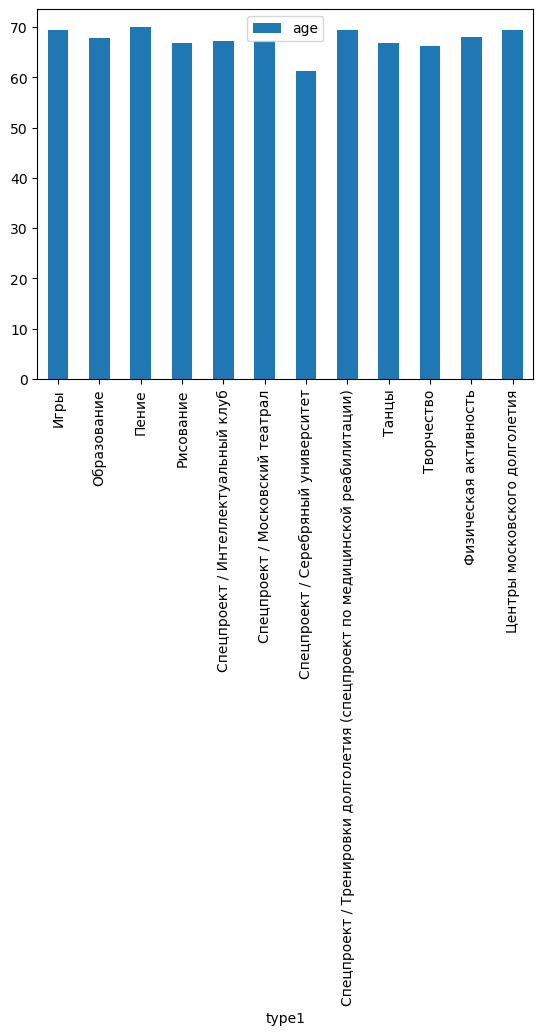

In [8]:
md = pd.DataFrame(plan.groupby(['type1'])[['age']].mean())
md.reset_index(drop=False, inplace=True)
display(md)
md.plot(x='type1', y='age', kind='bar')

In [9]:
plan.numzan.nunique()

647132

In [10]:
plan.numclient.nunique()

50906

In [11]:
# pd.set_option('display.max_rows', 500)
# plan.groupby(['type1'])[['type2', 'type3']].value_counts().to_frame()

In [12]:
plan.head()

,numzan,numgroup,numclient,type1,type2,type3,online,sex,datebirth,age
0,401346550,801346550,101352023,Физическая активность,ОНЛАЙН Гимнастика,ОНЛАЙН Цигун,Да,Женщина,1959-01-18,64
1,401348283,801346550,101352023,Физическая активность,ОНЛАЙН Гимнастика,ОНЛАЙН Цигун,Да,Женщина,1959-01-18,64
2,401351970,801346550,101352023,Физическая активность,ОНЛАЙН Гимнастика,ОНЛАЙН Цигун,Да,Женщина,1959-01-18,64
3,401355095,801346550,101352023,Физическая активность,ОНЛАЙН Гимнастика,ОНЛАЙН Цигун,Да,Женщина,1959-01-18,64
4,401365374,801346550,101352023,Физическая активность,ОНЛАЙН Гимнастика,ОНЛАЙН Цигун,Да,Женщина,1959-01-18,64


In [13]:
plan.type3.nunique()

453

In [14]:
# from itertools import combinations
# from collections import Counter
# dat=pd.DataFrame(plan)
# counter = Counter()
# dat.apply(lambda x: counter.update(combinations(x[~x.isna()].values, 5)))
# print(counter.most_common(1))

# Для модели

In [ ]:
# from sklearn.metrics.pairwise import cosine_similarity
# from sklearn.metrics import mean_squared_error
# from sklearn.model_selection import train_test_split
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.metrics.pairwise import linear_kernel

# import time


In [ ]:
# tfidf = TfidfVectorizer(
#     stop_words="english",   английский язык не подходит, сюда надо передать русский
# )
# plan['type3'] = plan['type3].fillna('')
# overview_matrix = tfidf.fit_transform(plan['type3])
# similarity_matrix = linear_kernel(overview_matrix,overview_matrix)
# mapping = pd.Series(plan.index,index = plan['type1])
# print(mapping)

In [ ]:
# print(f"vectorization done in {time() - t0:.3f} s")
# print(f"n_samples: {X_tfidf.shape[0]}, n_features: {X_tfidf.shape[1]}")

In [ ]:
# def recommend_dolgoletie(content_input):
#     content_index = mapping[content_input]
#     similarity_score = list(enumerate(similarity_matrix[content_index]))
#     similarity_score = sorted(similarity_score, key=lambda x: x[1], reverse=True)
#     similarity_score = similarity_score[1:10]
#     content_indices = [i[0] for i in similarity_score]
#     return (plan['type1'].iloc[content_indices])

# print(recommend_dolgoletie(''))